In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
#sns.set() # you can set seaborn plot style
plt.style.use('ggplot') # importing R plot for better plot

In [3]:
## data import#######################
count = pd.read_csv("voom_count.csv", index_col = 0)
count = count.T
y = pd.read_csv("colData.csv", index_col = 0)
y_df = y
y_df.head()

,Group
MB31,WNT
MB148,WNT
MB140,WNT
MB130,WNT
MB128,WNT


In [4]:
count.head()

,circ_6,circ_7,circ_9,circ_10,circ_11,circ_12,circ_15,circ_20,circ_26,circ_36,...,circ_78992,circ_78998,circ_79013,circ_79049,circ_79050,circ_79063,circ_79068,circ_79077,circ_79085,circ_79092
MB31,5.015555,7.162397,2.208200,2.208200,6.115091,8.511981,6.963088,5.015555,2.208200,8.474987,...,7.162397,6.600518,5.378125,7.162397,2.208200,2.208200,5.378125,2.208200,2.208200,6.456128
MB148,7.142415,6.095110,2.188219,2.188219,6.580536,6.832075,6.436146,2.188219,2.188219,8.165499,...,5.888659,2.188219,6.095110,8.337966,2.188219,2.188219,2.188219,2.188219,2.188219,5.647651
MB140,4.132656,4.132656,4.132656,4.132656,4.132656,7.592087,4.132656,4.132656,4.132656,4.132656,...,7.302581,4.132656,4.132656,8.039546,4.132656,4.132656,4.132656,8.039546,4.132656,4.132656
MB130,3.738798,7.439238,6.546153,6.908723,6.908723,7.986725,6.546153,3.738798,3.738798,3.738798,...,8.131115,3.738798,6.546153,6.546153,3.738798,7.198230,3.738798,3.738798,6.546153,3.738798
MB128,3.550265,7.250705,3.550265,5.872193,3.550265,6.720190,7.942582,3.550265,3.550265,7.942582,...,3.550265,7.009697,3.550265,5.872193,3.550265,3.550265,3.550265,3.550265,3.550265,6.357620


In [ ]:
## Does not need scaling
# Feature Scaling
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [5]:
#####Recursive feature elimination with cross-validation using RFC###################
#Recursive feature elimination (RFE) with random forest
from sklearn.feature_selection import RFE
x = count
## one hot encoder
y = y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Recursive feature elimination with cross-validation using RFC
# The "accuracy" scoring is proportional to the number of correct classifications
rf_new = RandomForestClassifier() 
rfecv = RFECV(estimator=rf_new, step=0.01, cv=10,scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(x, y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', count.columns[rfecv.support_])


/Users/rpokhre2/miniforge3/envs/TFW/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/rpokhre2/miniforge3/envs/TFW/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/rpokhre2/miniforge3/envs/TFW/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/rpokhre2/miniforge3/envs/TFW/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:241: DataConversionWarn

Optimal number of features : 193
Best features : Index(['circ_147', 'circ_256', 'circ_322', 'circ_369', 'circ_376', 'circ_464',
       'circ_485', 'circ_502', 'circ_516', 'circ_549',
       ...
       'circ_77160', 'circ_77289', 'circ_77438', 'circ_77823', 'circ_77855',
       'circ_77990', 'circ_78142', 'circ_78417', 'circ_78614', 'circ_78978'],
      dtype='object', length=193)


/Users/rpokhre2/miniforge3/envs/TFW/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X[:, features], y)
/Users/rpokhre2/miniforge3/envs/TFW/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:629: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(self.transform(X), y)


In [7]:
## OOB error#####################################
x = count[count.columns[rfecv.support_]]
y = y_df.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
error_rate = {}
for i in range(10,1000,10):
    rfc = RandomForestClassifier(n_estimators=i, random_state=42, warm_start=True, oob_score=True)
    rfc.fit(x_train,y_train)
    oob_error = 1 - rfc.oob_score_
    error_rate[i] = oob_error

/var/folders/y9/8dnsd3_16m95nbk642bmbyyr0000gq/T/ipykernel_36773/532266173.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)
/var/folders/y9/8dnsd3_16m95nbk642bmbyyr0000gq/T/ipykernel_36773/532266173.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)
/var/folders/y9/8dnsd3_16m95nbk642bmbyyr0000gq/T/ipykernel_36773/532266173.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)
/var/folders/y9/8dnsd3_16m95nbk642bmbyyr0000gq/T/ipykernel_36773/532266173.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), fo

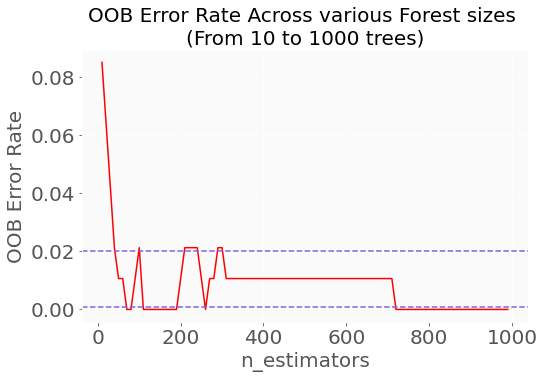

In [10]:
### plotting OOB Error ####################################
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.02, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.001, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators', fontsize = 20)
plt.ylabel('OOB Error Rate', fontsize = 20)
plt.title('OOB Error Rate Across various Forest sizes \n(From 10 to 1000 trees)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.axvline(750) #not wnt 360, all = 500, fourvsrest = 750
#plt.savefig("OOB_error_fourvsRest.png", dpi = 300,  bbox_inches='tight')
plt.show()


In [50]:
## Applying the Random Forest Finally
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

#### remove this for fair calculation #####
imp = list(count.columns[rfecv.support_]) ## to enclude circ_63706
imp.append("circ_63706") ## to enclude circ_63706
x = count[imp]
##################

#x = count[count.columns[rfecv.support_]]
y = y_df.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)
rfc= BalancedRandomForestClassifier(n_estimators=500, random_state=42) ## n_estimator given by OOB Error
rfc.fit(x_train,y_train)
accuracy = accuracy_score(rfc.predict(x_test), y_test)
importance = rfc.feature_importances_
print("accuracy_score: ", accuracy)


/var/folders/y9/8dnsd3_16m95nbk642bmbyyr0000gq/T/ipykernel_36773/1680546076.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


accuracy_score:  0.96875


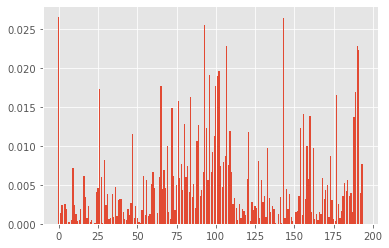

In [51]:
importance = rfc.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [130]:
### Random Forest Important features Identification ####
group = ["WNT", "SHH", "Group3", "Group4"]
Li = []
for i in group:
    c = i
    #X = count[count.columns[rfecv.support_]]
    X = count[imp]
    Y = y_df
    Y= Y[Y.Group==c]
    Y = list(Y.index)
    vip = X.loc[Y].mean()*importance
    vip = vip.sort_values(ascending = False)
    Li.append(vip)
    
vip_df = pd.concat(Li, axis = 1)
vip_df.columns = group
vip_df = vip_df.replace(np.nan, 0)
vip_df2 = vip_df[vip_df >0.1]  # filter the features having coefficient greater than 0.1
vip_df2 = vip_df2.dropna(thresh = 1)
#vip_df = vip_df.replace(np.nan, 0)
vip = list(vip_df2.index)
vip.append("circ_63706")
vip_df = vip_df.loc[vip]

vip_df = np.round(vip_df,2)
#vip_df[vip_df <=0.05] = 0
vip_df.columns
vip_df["sum"] = vip_df.sum(axis =1)

In [131]:
## Converting to 100 % contribution
vip_df["WNT"] = vip_df["WNT"]/vip_df["sum"]
vip_df["SHH"] = vip_df["SHH"]/vip_df["sum"]
vip_df["Group3"] = vip_df["Group3"]/vip_df["sum"]
vip_df["Group4"] = vip_df["Group4"]/vip_df["sum"]
vip_df = vip_df.drop("sum", axis = 1)
vip_df = vip_df*100

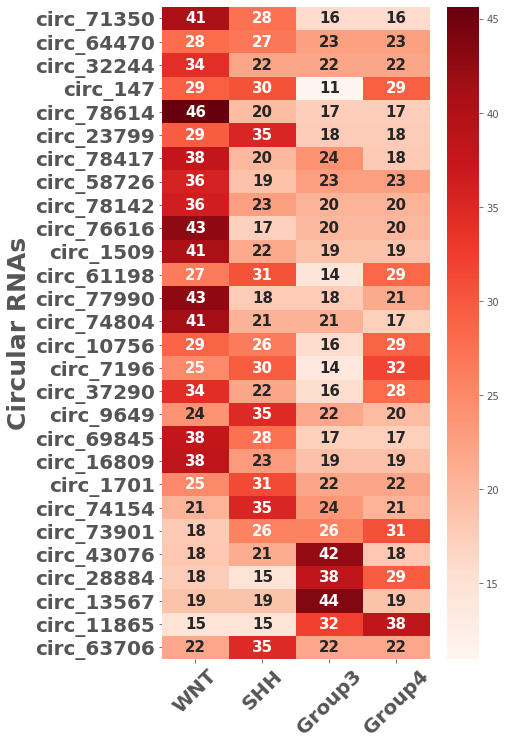

In [132]:
## Plot the VIP score  #######
plt.figure(figsize = (6,12))
sns.heatmap(vip_df, cmap = "Reds", annot = True, annot_kws = {"fontsize":15, "fontweight": "bold"})
plt.ylabel("Circular RNAs", fontsize = 25, weight = "bold")
plt.xlabel("",fontsize = 25, weight = "bold")
plt.xticks(fontsize = 20, rotation = 45, weight = "bold")
plt.yticks(fontsize = 20,rotation = 0, weight = "bold")
plt.savefig("VIPrandomForest_revised.pdf", dpi = 300,  bbox_inches='tight')
plt.show()

AUC for Class 1: 0.9703703703703703
AUC for Class 2: 1.0
AUC for Class 3: 1.0
AUC for Class 4: 0.9090909090909091


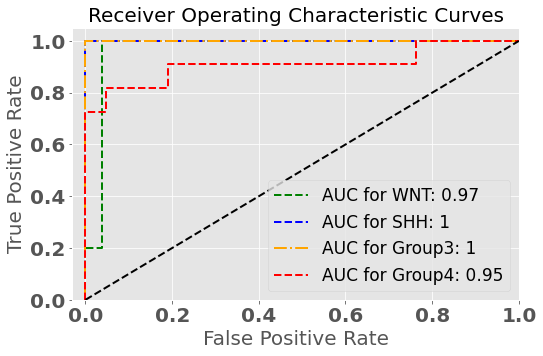

In [133]:
#### ROC curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
x= count
y = y_df.values

y = label_binarize(y, classes=["WNT","SHH","Group3", "Group4"])
n_classes = 4
## split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)
# classifier
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, random_state=42))
y_score = clf.fit(x_train, y_train).predict_proba(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
col = ["green", "blue", "orange", "red"]
alpha = [0.1, 0.2,0.3,0.4]
ls = ["--", "--", "-.", "--"]
plt.figure(figsize= (8,5))
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color=col[i], lw=2,  linestyle=ls[i])
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i]))) ## reference this for label plot
  roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 0, weight = "bold")
plt.yticks(fontsize = 20,rotation = 0, weight = "bold")
plt.title('Receiver Operating Characteristic Curves', fontsize = 20)
# Replace the values in the label according to the resultin roc_auc dictionary
labels = ['AUC for WNT: 0.97', 'AUC for SHH: 1', 'AUC for Group3: 1', "AUC for Group4: 0.95"]
plt.legend(labels, prop={"size":17})
#plt.savefig("ROCcurve.pdf", dpi = 300,  bbox_inches='tight')
plt.show()


In [175]:
wnt = vip_df.sort_values("Group4", ascending = False)
top5 = [i for i in wnt.head(5).index]
[print(i) for i in top5]

circ_11865
circ_7196
circ_73901
circ_28884
circ_147


[None, None, None, None, None]

In [176]:
## Importing top from Limma
limma = pd.read_csv("limmaTop.csv", sep = "\s+")
for i in top5:
    if i in limma["Group4"].values:
        print(i)




In [148]:
limma

,Group4,Group3,WNT,SHH
0,circ_21305,circ_13567,circ_71350,circ_30598
1,circ_72082,circ_40859,circ_51087,circ_64014
2,circ_56936,circ_43076,circ_55605,circ_45001
3,circ_29196,circ_32835,circ_78614,circ_4097
4,circ_74145,circ_30459,circ_39796,circ_66962
5,circ_77438,circ_60461,circ_42444,circ_9649
6,circ_33068,circ_62787,circ_50345,circ_28243
7,circ_52938,circ_7624,circ_68037,circ_63706
8,circ_63166,circ_68493,circ_62407,circ_1701
9,circ_61700,circ_28884,circ_76616,circ_11342


In [149]:
vip_df

,WNT,SHH,Group3,Group4
circ_71350,40.579710,27.536232,15.942029,15.942029
circ_64470,27.956989,26.881720,22.580645,22.580645
circ_32244,34.246575,21.917808,21.917808,21.917808
circ_147,29.268293,30.487805,10.975610,29.268293
circ_78614,45.652174,19.565217,17.391304,17.391304
circ_23799,29.411765,35.294118,17.647059,17.647059
circ_78417,38.000000,20.000000,24.000000,18.000000
circ_58726,35.849057,18.867925,22.641509,22.641509
circ_78142,36.363636,22.727273,20.454545,20.454545
circ_76616,42.857143,17.142857,20.000000,20.000000
